In [1]:
import sympy as sym
sym.init_printing()
%matplotlib inline

s, z, x = sym.symbols('s, z, x')
k = sym.Symbol('k', integer=True)
Dt = sym.Symbol('\Delta t', positive=True)

# Transformada $\mathcal{Z}$

## 1. Objetivos

O objetivo deste capítulo é apresentar e definir a transformada $\mathcal{Z}$ e suas propriedades, também é nosso objetivo apresentar a transformada $\mathcal{Z}$ inversa. Por último, apresentamos a transformada $\mathcal{Z}$ como uma ferramenta para resolução de equações diferenciais.

## 2. Definição

A transformada $\mathcal{Z}$ é uma importante ferramenta na descrição e análise de sistemas digitais. Estamos oferecendo técnicas para implementação de filtros digitais e análise de frequência de sinais digitais. Definimos aqui a transformada $\mathcal{Z}$ como:

$$X(z) = Z(x(n)) = \sum_{n=0}^{\infty}x(n)z^{-n}$$
$$= x(0)z^{-0} + x(1)z^{-1} + x(2)z^{-2} ...$$

onde $z$ é uma variável complexa. Note que aqui definimos a transformada $\mathcal{Z}$ a partir de $n=0$ está é conhecida como a transformada $\mathcal{Z}$ unilateral. Abaixo segue alguns exemplos.

#### Exemplo 1
Dado a sequência:
$$x(n)= u(n)$$
Encontre a transformada $\mathcal{Z}$ de $x(n)$

**Solução**

A partir da definição da transformada $\mathcal{Z}$, temos

$$X(z) = \sum_{n=0}^{\infty}x(n)z^{-n} = \sum_{n=0}^{\infty}(z^{-1})^n = 1 + (z^{-1}) + (z^{-1})^2 ...$$

está é uma serie geometrica que converge para:
$$X(z) = \frac{z}{z-1}$$

Com a condição de que $|z^{-1}| < 1$. Note que para uma série geométrica infinita, nós temos $1+r+r^2+...=\frac{1}{1-r}$ quando $|r| < 1$. Com isso os valores para a região de convergência é dados por $|z| > 1$.

#### Exemplo 2

Data a sequência

$$x(n) = a^nu(n)$$

encontre a transformada $\mathcal{Z}$ da sequência $x(n)$

**Solução:**
Da definição da transformada transformada $\mathcal{Z}$, temos

$$X(Z) = \sum_{n=0}^{\infty}x(n)z^{-n} = \sum_{n=0}^{\infty}(az^{-1})^n = 1 + (az^{-1}) + (az^{-1})^2 ...$$

Uma vez que esta é uma série geométrica que converge para $|az^{^-1}| < 1$ sua expressão geral é dada por

$$X(z) = \frac{z}{z-1}$$ Para $|z|>|a|$

Os sinais desempenham um papel importante na teoria dos sinais e sistemas. Para um sinal causal com $x[k] = 0$ para $k < 0$, a relação $x[k] = x[k] \cdot \epsilon[k]$ se mantém. A introdução disso na definição dos resultados de transformação $z$ bilateral em

\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \cdot \epsilon[k] \, z^{-k} = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

Isso motiva a definição da transformação unilateral de $z$

\begin{equation}
X(z) = \sum_{k = 0}^{\infty} x[k] \, z^{-k}
\end{equation}

### Unilateral

Para x[k] = 1, pode-se representar a transformada z como da forma a seguir

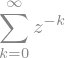

In [2]:
transform = sym.Sum(1 * z**-k, (k, 0, sym.oo))
transform

O sympy pode reconhecer essa série infinita como uma série geométrica e, sob certas condições de convergência, pode encontrar uma representação finita:

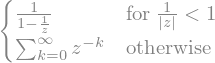

In [3]:
short_form = transform.doit()
short_form

Extraindo o primeiro caso como exemplo, temos

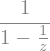

In [4]:
ex = short_form.args[0][0]
ex

### Bilateral

### Transformada-$\mathcal{Z}$ Bilateral

A transformada $Z$ bilateral é definida como

\begin{equation}
X(z) = \sum_{k = -\infty}^{\infty} x[k] \, z^{-k}
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k]\}$ denota a transformada-$z$ de $x[k]$. Um sinal complexo $x[k] \in \mathbb{C}$ com índice discreto $k \in \mathbb{Z}$ é representado por seu complexo de valor $X(z) \in \mathbb{C}$ com a variável dependente complexa $z \in \mathbb{C}$. A variável $z$ pode ser interpretada como a frequência complexa $z = e^{\Sigma + j \Omega}$ com $\Sigma, \Omega \in \mathbb{R}$. Se uma transformada-$z$ $X(z) = \mathcal{Z} \{x[k]\}$ existe depende da frequência complexa $z$ e do próprio sinal $x[k]$. Todos os valores $z$ para os quais a transformação $z$ converge formam uma região de convergência (ROC). As transformações de $z$ de dois sinais diferentes podem diferir apenas em relação aos seus ROCs. Conseqüentemente, o ROC precisa ser explicitamente dado para uma inversão única da transformação $z$.

Para x[k] = 1, pode-se representar a transformada z como da forma a seguir

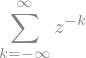

In [5]:
transform = sym.Sum(1 * z**-k, (k, -sym.oo, sym.oo))
transform

### 2.1 Região de Convergência da Transformada $\mathcal{Z}$

A transformada z não converge para todas as sequências ou para todos os valores de z. Para qualquer sequência dada, o conjunto de valores de z para os quais a série de potências da transformada z converge é chamado de *região de convergência* (**RDC**) da transformada $\mathcal{Z}$. Se a sequência for somável em valor absoluto, a transformada de Fourier converge
para uma função contínua de ω. Aplicar esse critério à equação da definição da transformada leva à condição para a convergência da transformada $\mathcal{Z}$.

$$|X(re^{j\omega})| \leq \sum_{n=0}^{\infty}|x[n]r^{^-n})| < \infty$$

Com isso, a **RDC** consiste em todos os valores de $z$ tal que a transformada converge para um valor. Podemos expressar a **ROC** de forma gráfica como é apresentado na figura abaixo.

![1](ROC.jpg)
<div align="center">Figura 1: Região de Convergência</div>

Para um sinal do lado direito de comprimento infinito com $x[k] = 0$ para $k < M$, o ROC é dado na forma de $|z| > a$ com $a \in \mathbb{R}^+$. Isso pode ser concluído a partir da decadência do termo $|z|^{-k}$ para $k \to \infty$, o que garante convergência para um dado $a$. No entanto, isso vale apenas para sinais $x[k]$ com crescimento exponencial.

O mesmo raciocínio leva aos ROCs de um sinal do lado esquerdo e do lado esquerdo. Os ROCs resultantes são ilustrados a seguir

![Roc Bilateral](ROC_Bilateral.png)

As áreas cinzas denotam os valores $z$ para os quais a transformação $z$ converge. As bordas $a$ dessas áreas (linhas tracejadas) dependem do sinal $x[k]$. No caso da transformação $z$ $X(z)$ ser dado em termos de uma função racional em $z$, o ROC deve ser escolhido de forma que não inclua zeros do polinômio denominador.

### 2.2 Tabela de Pares da Transformada $\mathcal{Z}$

$$x(n), n\geq0$$     | Transformada $\mathcal{Z}$                                     | Região de Convergência
:------------------- | :------------------------------------------------------------: | :-------
$X(n)$               | $$\sum_{n=0}^{\infty}x(n)z^{-n}$$                              | 
$\delta(n)$          | 1                                                              | $|z| > 0$
$au(n)$              | $$\frac{az}{z-1}$$                                             | $|z| > 1$
$nu(n)$              | $$\frac{z}{(z-1)^2}$$                                          | $|z| > 1$
$n^2u(n)$            | $$\frac{z(z+1)}{(z-1)^3}$$                                     | $|z| > 1$
$a^nu(n)$            | $$\frac{z}{z-a}$$                                              | $|z| > |a|$
$e^{-na}u(n)$        | $$\frac{z}{(z-e^{-a})}$$                                       | $|z| > e^{-a}$
$na^nu(n)$           | $$\frac{az}{(z-a)^2}$$                                         | $|z| > |a|$
$sin(an)u(n)$        | $$\frac{zsin(a)}{z^2 - 2zcos(a) + 1}$$                         | $|z|> 1$
$cos(an)u(n)$        | $$\frac{z[z-cos(a)]}{z^2 -2zcos(a)+1}$$                        | $|z| > 1$
$a^nsin(bn)u(n)$     | $$\frac{[asin(b)]z}{z^2-[2acos(b)]z + a^2}$$                   | $|z| > |a|$
$a^ncos(bn)u(n)$     | $$ \frac{z[z - acos(b)]}{z^2 - [2acos(b)]z + a^{-2}} $$        | $|z| > |a|$
$e^{-an}sin(bn)u(n)$ | $$\frac{[e^{-a}sin(b)]z}{z^2 - [2e^{-a}cos(b)]z + e^{-2a}}$$   | $|z| > e^{-a}$
$e^{-an}cos(bn)u(n)$ | $$\frac{z[z-e^{-a}cos(b)]}{z^2 - [2e^{-a}cos(b)]z + e^{-2a}}$$ |  $|z| > e^{-a}$

## 3. Propriedades da Transformada $\mathcal{Z}$

Nesta seção apresentaremos algumas propriedades importantes da transformada $\mathcal{Z}$. Estas propriedades são amplamente utilizadas na resolução de problemas envolvendo a transformada $\mathcal{Z}$.

### 3.1 Propriedade da Linearidade

#### A transformada $\mathcal{Z}$ é uma transformada linear, o que implica:

$$Z(ax_1(n) + bx_2(n)) = aZ(x_1n) + bZ(x_2n)$$

Onde $x_1(n$) e $x_2(n)$ são as sequências amostradas, enquanto $a$ e $b$ são constantes arbitrárias.

A seguir, apresentamos um exemplo para fixação da propriedade.

#### Exemplo 3

Encontre a transformada $\mathcal{Z}$ da sequência definida por

$$x(n) = u(n) - (0,5)^nu(n)$$

**Solução:**

Aplicando a propriedade da linearidade temos que
$$X(Z) = Z(x(n)) = Z(u(n)) - Z(0,5^nu(n))$$

daí utilizando a tabela de pares

$$Z(u(n)) = \frac{z}{z-1}$$
e
$$Z(0,5^nu(n)) = \frac{z}{z-0,5}$$

### 3.2 Propriedade do Deslocamento no Tempo

A propriedade de deslocamento no tempo é

$$x[n-n_0] \longleftrightarrow^{\mathcal{Z}} z^{-n_0}X(z)$$

RDC  = $r_x$ (exceto pela adição ou exclusão de $z=0$ ou $z=\infty$).

A quantidade $n_0$ é um inteiro. Se $n_0$ for positivo, a sequência original $x[n]$ é deslocada para a direita, e se $n_0$ for negativo, $x[n]$ é deslocada para a esquerda. Assim como no caso da linearidade, a RDC pode ser modificada,
pois o fator $z^{−n_0}$ pode alterar o número de pólos em $z = 0$ ou $z = \infty$.



**Exemplo**

Vamos considerar um sistema que atrasa um sinal por um determinado número de amostras. Seu sinal de saída $y[k] = \mathcal{H} \{x[k] \} $ lê

\begin{equation}
y[k] = x[k-\kappa]
\end{equation}

onde $\kappa \in \mathbb{N}$. Aplicar a transformação $z$ bilateral para os lados esquerdo e direito 

\begin{equation}
Y(z) = z^{-\kappa} \cdot X(z)
\end{equation}

onde $Y(z) = \mathcal{Z} \{y[k] \}$ e $X(z) = \mathcal{Z} \{y[k] \}$. A função de transferência $H(z)$ do sistema pode ser deduzida da representação espectral da saída do sistema $Y(z) = H(z) \cdot X(z)$ como

\begin{equation}
H(z) = z^{- \kappa}
\end{equation}

Atrasar um sinal é uma operação freqüentemente aplicada no processamento de sinais discretos. Os diagramas de bloco que ilustram algoritmos de processamento de sinal freqüentemente contêm blocos que constituem atrasos. Esses blocos são comumente anotados pela função de transferência correspondente $z^{-\kappa}$.

### 3.3 Multiplicação por uma sequência exponencial

A propriedade de multiplicação de exponencial é

$$z_{0}^{n}x[n] \longleftrightarrow^{\mathcal{Z}} X(z/z_0)$$

RDC = $|z_0|R_x$.

A notação RDC = $|z_0|Rx$ significa que a RDC é $Rx$ multiplicada escalarmente pelo número $|z_0|$; isto é, se $Rx$ é o conjunto de valores de $z$ tal que $r_R < |z| < r_L$, então $|z_0|Rx$ é o conjunto de valores de $z$ tal que $|z_0|r_R < |z| < |z_0|r_L$.

### 3.4 Diferenciação de $X(z)$

A propriedade da diferenciação estabelece que

$$nx[n] \longleftrightarrow^{\mathcal{Z}} -z\frac{dX(z)}{dz}$$

RDC = $R_x$.

Essa propriedade é verificada pela diferenciação da expressão da transformada $\mathcal{Z}$ isto é, para

$$X(z) = \sum_{n=0}^{\infty}x[n]z^{-n}$$

obtemos

$$-z\frac{dX(z)}{dz} = -z\sum_{n=0}^{\infty}(-n)x[n]z^{-n-1}$$


$$= \sum_{n=0}^{\infty}nx[n]z^{-n} = \mathcal{Z}\{nx[n]\}$$

### 3.5 Conjugação de uma sequência complexa

A propriedade de reflexão no tempo é dada por

$$x^*[n] \longleftrightarrow^{\mathcal{Z}} X^*(z^*)$$
RDC = $R_x$

Essa propriedade segue de maneira direta a definição da transformada z.

### 3.6 Reflexão no tempo

A propriedade de reflexão no tempo é dada por
$$x^*[-n] \longleftrightarrow^{\mathcal{Z}} X^*(\frac{1}{z^*})$$

RDC = $\frac{1}{R_x}$

A notação RDC = $\frac{1}{R_x}$ implica que $Rx$ é invertida; isto é, se $Rx$ é o conjunto de valores de $z$ tal que $r_R < |z| < r_L$, então a RDC para $X*(\frac{1}{z^*})$ é o conjunto de valores de $z$ tal que $ \frac{1}{r_L} < |z| < \frac{1}{r_R}$. Assim, se z0 estiver na RDC e $x[n]$, então $\frac{a}{z_0}$ está na RDC para a transformada $\mathcal{Z}$ de $x^*[−n]$.

**Exemplo** 

A transformação $z$ do sinal exponencial complexo anticausal $x[k] = -z_0 ^ k \cdot \epsilon[k - 1]$ é derivada pela aplicação de uma série de transformações ao sinal exponencial complexo $z_0[k] \cdot \epsilon[k]$. A reversão do sinal exponencial complexo produz

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k] \} = \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

Agora, o teorema do deslocamento é aplicado ao sinal deslocado

\begin{equation}
\mathcal{Z} \{ z_o^{-k-1} \cdot \epsilon[-k-1] \} = z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

O fator $z_0^{-1}$ é uma constante em relação à transformação $z$. Isso produz

\begin{equation}
\mathcal{Z} \{ z_o^{-k} \cdot \epsilon[-k-1] \} = z_0 z \cdot \frac{z^{-1}}{z^{-1} - z_0}
\end{equation}

Observando que $z_o^{-k} = \left(\frac{1}{z_o} \right)^k$ obtemos

\begin{equation}
\mathcal{Z} \{ \left( \frac{1}{z_o} \right)^{k} \cdot \epsilon[-k-1] \} = z_0^{-1} z \cdot \frac{z^{-1}}{z^{-1} - z_0^{-1}} = \frac{z}{z_0 - z}
\end{equation}

A partir disso, a transformação $z$ do sinal exponencial complexo anticausal segue como

\begin{equation}
\mathcal{Z} \{ - z_0^{k} \cdot \epsilon[-k-1] \} =  \frac{z}{z - z_0}
\end{equation}

Ao considerar a influência das etapas acima no ROC, ela é derivada como

\begin{equation}
|z| < |z_0|
\end{equation}

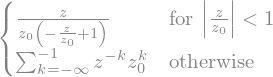

In [6]:
z0 = sym.symbols('z0', complex=True)
sym.summation(z0**k * z**(-k), (k, -sym.oo, -1))

### 3.7 Convolução de sequências

De acordo com a propriedade da convolução,

$$x_1[n]*x2[n] \longleftrightarrow^{\mathcal{Z}} X_1(z)X_2(z)$$

RDC contém $R_x1 \cap R_x2$

Para demonstrar essa propriedade formalmente, consideramos

$$y[n] = \sum_{k=-\infty}^{\infty}x_1[k]x_2[n - k]$$

de modo que 

$$Y(z) = \sum_{n=-\infty}^{\infty}y[n]z^{-n}$$

$$= \sum_{n=-\infty}^{\infty} \left\{ \sum_{k=-\infty}^{\infty}x_1[k]x_2[n-k] \right\}z^{-n}$$

Se trocarmos a ordem do somatório (o que é permitido para z na RDC),

$$Y(z) = \sum_{k=-\infty}^{\infty}x_1[k] \sum_{n=-\infty}^{\infty}x_2[n-k]z^{-n}$$

Mudando o índice do somatório na segunda soma de n para m = n − k, obtemos

$$Y(z) = \sum_{k-\infty}^{\infty}x_1[k] \left \{ \sum_{m=-\infty}^{\infty}x_2[m]z^{-m} \right\}z^{-k}$$

$$= \sum_{k=-\infty}^{\infty}x_1[k]X_2(z)z^{-k} = \left( \sum_{k=-\infty}^{\infty}x1[k]z^{-k} \right)X2(z)$$

Assim, para valores de z dentro das RDCs de $X_1(z)$ e $X_2(z)$, podemos escrever
$$Y(z) = X_1(z)X_2(z)$$


sendo que a RDC inclui a interseção das RDCs de $X_1(z)$ e $X_2(z)$. Se um polo que está na borda da RDC de uma das transformadas $\mathcal{Z}$ for cancelado por um zero da outra, então a RDC de $Y(z)$ pode ser maior.

**Exemplo**

A convolução linear de dois sinais retangulares $\text{rect}_N [k] * \text{rect}_M [k]$ resulta em um sinal de tamanho finito de forma trapezoidal. A transformação-$z$ deste sinal é derivada pela aplicação do teorema da convolução junto com a transformada do sinal retangular. Isto resulta em

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] * \text{rect}_M[k] \} 
= \sum_{k=0}^{N-1} z^{-k} \cdot \sum_{k=0}^{M-1} z^{-k}
= \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} \cdot \frac{1 - z^{-M}}{1 - z^{-1}} & \text{para } z \neq 1 \\
N \cdot M & \text{para } z = 1
\end{cases}
\end{equation}

O ROC do sinal retangular é $z \in \mathbb{C} \setminus\{0 \}$. O ROC da convolução de dois sinais retangulares também é $z \in \mathbb{C} \setminus\{0 \}$, já que em geral nenhum pólo e zeros se cancelam. Os pólos e zeros de $\mathcal{Z} \{\text{rect}_N [k] * \text{rect}_M [k] \} $ são calculados e ilustrados a seguir.


In [7]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle


def pole_zero_plot(p, z):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    
    for pole in p:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
    for zero in z:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10, fillstyle='none')

    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.7)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.title('Polos e Zeros')
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')

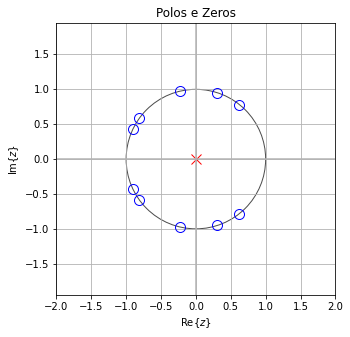

In [8]:
N = 5
M = 7

z = sym.symbols('z', complex=True)
k = sym.symbols('k', integer=True)

X = sym.summation(z**(-k), (k,0,N-1)) * sym.summation(z**(-k), (k,0,M-1))

poles = sym.roots(sym.denom(X) * z, z)
zeros = sym.roots(sym.numer(X) * z**(N+M-2), z)

pole_zero_plot(poles, zeros)

### 3.8 Modulação

A modulação complexa de um sinal $x[k]$ é definida como $z_0^{k} \cdot x[k]$ com $z_0 \in \mathbb{C} \setminus \{0 \}$. A transformação $z$ de um sinal modulado é derivada introduzindo-o na definição da transformação $z$ bilateral

\begin{equation}
\mathcal{Z} \left\{ z_0^k \cdot x[k] \right\} =
\sum_{k = -\infty}^{\infty} x[k] z_0^k \, z^{-k} =
\sum_{k = -\infty}^{\infty} x[k] \, \left( \frac{z}{z_0} \right)^{-k}
= X \left( \frac{z}{z_0} \right)
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \} $. A modulação do sinal $x[k]$ leva a um escalonamento complexo do plano $z$ pelo fator $z_0$. A escala complexa de $z$ pode ser expressa como

\begin{equation}
\frac{z}{z_0} = \frac{|z|}{|z_0|} \; e^{j (\arg(z) - \arg(z_0))}
\end{equation}

onde $\arg(z)$ e $\arg(z_0)$ denotam o argumento (fase) de $z$ e $z_0$, respectivamente. Segue-se desta representação que a escala complexa por $z_0$ pode ser interpretada como uma escala e rotação do plano $z$.

O ROC também é em escala complexa

\begin{equation}
\text{ROC} \{ z_0^k \cdot x[k] \} = \{z: \frac{z}{z_0} \in \text{ROC} \{ x[k] \} \}
\end{equation}

Essa relação é conhecida como teorema da modulação.

**Exemplo** 

A transformação $z$ de um sinal exponencial harmônico $e^{j \Omega_0 k}$ de duração finita $N$ é derivada da seguinte forma. O sinal pode ser expresso como $e^{j \Omega_0 k} \cdot \text{rect}_N[k]$ que permite aplicar o teorema da modulação com $z_0 = e^{j \Omega_0}$. Junto com a Transformação z do sinal retangular, isso produz

\begin{equation}
\mathcal{Z} \{ e^{j \Omega_0 k} \cdot \text{rect}_N[k] \} = \begin{cases}
\frac{1 - \left( \frac{z}{e^{j \Omega_0}} \right)^{-N}}{1 - \left( \frac{z}{e^{j \Omega_0}} \right)^{-1}} & \text{para } z \neq e^{j \Omega_0} \\
N & \text{para } z = e^{j \Omega_0}
\end{cases}
\end{equation}

para $z \in \mathbb{C} \setminus \{ 0 \}$.

## 4. Transformadas de sinais elementares

### 4.1 Sinais finitos

A transformação $z$ de um sinal genérico $x[k]$ de duração finita $x[k] = 0$ para $\{k: k < M_1 \wedge k \geq M_2 \}$ com $ M_1 < M_2$ leituras

\begin{equation}
X(z) = \sum_{k=M_1}^{M_2 - 1} x[k] \, z^{-k} = x[M_1] \, z^{-M_1} + x[M_1 + 1] \, z^{- (M_1 + 1)} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

A transformação de um sinal de comprimento finito genérico é dada como um polinômio em $z$. Dependendo dos limites particulares $M_1$ e $M_2$, o polinômio pode conter potências de $z$ e $z^{-1}$. Para um sinal causal de comprimento finito, o resultado acima se especializa no caso $M_1 = 0$ e $M_2 > 0$ como 

\begin{equation}
X(z) = x[0] + x[1] \, z^{-1} + \dots + x[M_2 - 1] \, z^{- (M_2-1)}
\end{equation}

A transformação de um sinal causal de comprimento finito é dada como um polinômio em $z^{-1} $. O ROC para este caso é dado como $z \in\mathbb{C} \setminus \{0 \}$. Considerações semelhantes geram a transformação $ z $ e o ROC de um sinal anticausal. Os ROCs para um sinal de comprimento finito genérico podem ser resumidos como

* $z \in \mathbb{C}$ para um sinal anticausal ($M_1 < 0$, $M_2 \leq 0$)
* $z \in \mathbb{C}_\infty$ if $x[k] = 0$ para $k \neq 0$ ($M_1 = 0$, $M_2 = 1$)
* $z \in \mathbb{C} \setminus \{ 0 \}$ para um sinal causal ($M_1 = 0$, $M_2 > 0$)

onde $\mathbb{C}_\infty = \mathbb{C} \cup \{\infty\}$ denota o conjunto de números complexos estendidos.

### 4.2 Transformação do sinal cosseno e seno

A transformada de Laplace do cosseno $\epsilon[k] \cdot \cos (\Omega_0 k)$ e seno $\epsilon[k] \cdot \sin (\Omega_0 k)$ sinal com $\Omega_0 \in \mathbb{R}$ é derivado expressando o cosseno/seno como uma superposição de sinais exponenciais harmônicos usando a fórmula de Euler

\begin{align}
\cos(\Omega_0 k) &= \frac{1}{2} \left( e^{j \Omega_0 k} + e^{-j \Omega_0 k} \right) \\
\sin(\Omega_0 k) &= \frac{1}{2j} \left( e^{j \Omega_0 k} - e^{-j \Omega_0 k} \right)
\end{align}

A transformação $z$ do sinal exponencial harmônico pode ser derivada do espectro do sinal exponencial complexo como

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot e^{j \Omega_0 k} \} = \frac{z}{z - e^{j \Omega_0}} \qquad \text{para } |z| > 1
\end{equation}

Explorando a linearidade da transformação de $z$

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot \cos(\Omega_0 k) \} = 
\frac{1}{2} \left( \frac{z}{z - e^{j \Omega_0}} + \frac{z}{z - e^{-j \Omega_0}} \right) =
\frac{z ( z - \cos(\Omega_0))}{z^2 - 2 z \cos(\Omega_0) + 1}
\qquad \text{para } |z| > 1
\end{equation}

e

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot \sin(\Omega_0 k) \} = 
\frac{1}{2j} \left( \frac{z}{z - e^{j \Omega_0}} - \frac{z}{z - e^{-j \Omega_0}} \right) =
\frac{z \sin(\Omega_0)}{z^2 - 2 z \cos(\Omega_0) + 1}
\qquad \text{para } |z| > 1
\end{equation}

### 4.3 Simetria para sinais de valor real

A transformação $z$ de um sinal conjugado $x^*[k]$ é dada como

\begin{equation}
\mathcal{Z} \{ x^*[k] \} = \sum_{k = -\infty}^{\infty} x^*[k] \, z^{-k} 
= \left( \sum_{k = -\infty}^{\infty} x[k] \, (z^*)^{-k} \right)^* 
= X^*(z^*)
\end{equation}

onde $X(z) = \mathcal{Z} \{x[k] \}$. O ROC de $x^*[k]$ é igual ao ROC de $x[k]$. O resultado acima é usado para derivar a transformação $z$ da parte real do sinal $x[k]$

\begin{equation}
\mathcal{Z} \left\{ \Re \{ x[k] \} \right\} = \mathcal{Z} \left\{ \frac{1}{2} ( x[k] + x^*[k] ) \right\} = \frac{1}{2} \left[ X(z) + X^*(z^*) \right]
\end{equation}

e parte imaginária

\begin{equation}
\mathcal{Z} \left\{ \Im \{ x[k] \} \right\} = \mathcal{Z} \left\{ \frac{1}{2j} ( x[k] - x^*[k] ) \right\} = \frac{1}{2j} \left[ X(z) - X^*(z^*) \right]
\end{equation}

Para um sinal de valor real $x[k] \in \mathbb {R} $ com $ \Im \{x[k] \} = 0$ segue que

\begin{equation}
X(z) = X^*(z^*)
\end{equation}

Pode-se concluir que a transformação $z$ de um sinal de valor real apresenta simetria conjugada complexa.
Os pólos e zeros de uma transformada-$z$ que pode ser expressa como uma função racional  em $z$

\begin{equation}
X(s) = \frac{\sum_{m=0}^{M} \beta_m z^{-m}}{\sum_{n=0}^{N} \alpha_n z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

com $Q = M-1$ e $P = N-1$ mostram também simetrias específicas. Da condição acima para a transformação $z$ de um sinal de valor real $x[k] \in \mathbb{R}$, pode-se concluir que os coeficientes $\alpha_n, \beta_m$ do numerador e denominador são valores reais. O teorema da raiz conjugada complexa afirma que as raízes de um polinômio com coeficientes de valor real são pares de valores reais ou complexos conjugados. Portanto, os zeros e os pólos da transformada-$z$ $X(z)$ de um sinal de valor real $x[k]$ são pares de valores reais ou conjugados complexos.

**Exemplo**

Como exemplo para um sinal de valor real, os pólos e zeros da transformada-$z$ $X(z) = \mathcal{Z} \{\epsilon[k] \cos (\Omega_0 k) \}$ são investigados . Primeiro, a transformação, conforme derivada acima, é definida no `SymPy`


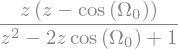

In [9]:
z = sym.symbols('z', complex=True)
W0 = sym.symbols('Omega0', real=True)

X = z * (z - sym.cos(W0)) / (z**2 - 2*z*sym.cos(W0) + 1)
X

As raízes de 𝑋 (𝑧) X (z) são calculadas

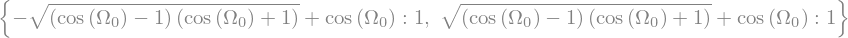

In [10]:
poles = sym.roots(sym.denom(X), z)
poles

bem como seus zeros

In [11]:
zeros = sym.roots(sym.numer(X), z)
zeros

Finalmente, o gráfico pólo-zero é desenhado para $\Omega = \frac{\pi}{4}$

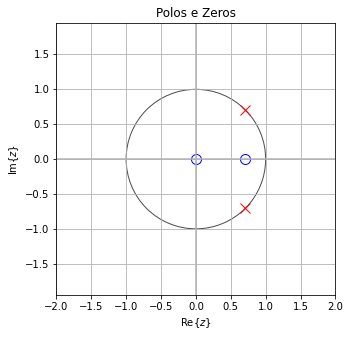

In [12]:
X2 = X.subs(W0, sym.pi/4)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

### 4.4 Transformação do Sinal Retangular

O sinal retangular $x[k] = \text{rect}_N[k]$ é um sinal causal de duração finita. Usando o resultado acima, sua transformação $z$ pode ser derivada diretamente como

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] \} = \sum_{k=0}^{N-1} z^{-k} = 1 + z^{-1} + \dots + z^{-N + 1}
\end{equation}

para $z \in \mathbb{C} \setminus \{0 \}$. A soma acima também pode ser interpretada como série geométrica finita com proporção comum $\frac{1}{z}$, resultando em uma forma alternativa de transformação-$z$ do sinal retangular

\begin{equation}
\mathcal{Z} \{ \text{rect}_N[k] \} =  \begin{cases}
\frac{1 - z^{-N}}{1 - z^{-1}} & \text{para } z \neq 1 \\
N & \text{para } z = 1
\end{cases}
\end{equation}

### 4.5 Transformação do Impulso de Dirac

A transformação $\mathcal{Z} \{\delta[k] \}$ do impulso de Dirac é derivada pela introdução de $\delta[k]$ na definição da transformação bilateral de $z$ e a exploração da propriedade de filtragem do impulso de Dirac


\begin{equation}
\mathcal{Z} \{ \delta[k] \} = \sum_{k = -\infty}^{\infty} \delta[k] \, z^{-k} = 1
\end{equation}

para $z \in \mathbb{C}$. O ROC cobre todo o plano complexo.

A transformação do impulso de Dirac é igual a um. Portanto, todas as frequências complexas $z$ estão presentes com o mesmo peso. Uma vez que o impulso de Dirac é usado para caracterizar sistemas lineares invariantes no tempo (LIT) por sua a resposta ao impulso $h[k] = \mathcal{H} \{\delta[k] \}$, isso constitui uma propriedade importante na teoria de sinais e sistemas discretos.

**Examplo**

A transformação $z$ do impulso de Dirac é calculada pela avaliação direta de sua definição. O impulso Dirac é representado pelo Kronecker delta $\delta[k] = \delta_{k 0}$ no `sym`.

In [13]:
X = sym.summation(sym.KroneckerDelta(k, 0) * z**(-k), (k, -sym.oo, sym.oo))
X

### 4.6 Transformação do Sinal Exponencial Complexa

A transformação $X(z) = \mathcal{Z} \{x[k] \}$ do sinal exponencial complexa causal

\begin{equation}
x[k] = \epsilon[k] \cdot z_0^k
\end{equation}

com frequência complexa $z_0 \in \mathbb{C}$ é derivado pela avaliação da definição da transformação $z$ unilateral

\begin{equation}
X(z) = \sum_{k=0}^{\infty} z_0^k \cdot z^{-k} = \sum_{k=0}^{\infty} \left( \frac{z_0}{z} \right)^k = \frac{z}{z - z_0}
\end{equation}

A última igualdade foi derivada observando que a soma constitui uma série geométrica infinita com razão comum $\frac{z_0}{z}$ que converge para $\left| \frac{z_0}{z} \right| < 1$. O ROC é, conseqüentemente, dado como

\begin{equation}
|z| > |z_0|
\end{equation}

Combinando os resultados acima, a transformação do sinal exponencial complexo causal é

\begin{equation}
\mathcal{Z} \{ \epsilon[k] \cdot z_0^k \} = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}


**Exemplo**

A transformação $z$ do sinal exponencial complexa causal $x[k] = z_0^k \cdot \epsilon[k]$ com $z_0 \in \mathbb{C}$ é calculada por avaliação direta de sua definição.

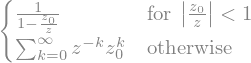

In [14]:
z0 = sym.symbols('z0')

X = sym.summation(z0**k * z**(-k), (k, 0, sym.oo))
X

Observe que a soma é devolvida caso não possa ser avaliada. Portanto, pode-se concluir que a série converge apenas para $|\frac{z_0}{z} | < 1$. Isso está de acordo com o resultado analítico derivado acima.

## 5. Transformadas $\mathcal{Z}$ e sistemas LIT

As propriedades discutidas na Seção anterior fazem a transformada z uma ferramenta muito útil na análise de sistemas de tempo discreto. Como devemos contar extensamente com a transformada $\mathcal{Z}$, vale a pena agora ilustrar como a transformada z pode ser usada na representação e análise dos sistemas LIT.

Um sistema LIT pode ser representado como a convolução $y[n] = x[n] * h[n]$ da entrada $x[n]$ com $h[n]$, sendo $h[n]$ a resposta do sistema à sequência impulso unitário $δ[n]$. Da propriedade da convolução, segue-se que a transformada de $y[n]$ é

$$Y(z) = X(z)H(z)$$

sendo $H(z)$ e $X(z)$ as transformadas z de $h[n]$ e $x[n]$, respectivamente. Nesse contexto, a transformada  $\mathcal{Z}$ $H(z)$ é chamada de função de sistema do sistema LIT, cuja resposta ao impulso é $h[n]$.

transformada $\mathcal{Z}$ é particularmente útil na análise de sistemas LIT descritos pelas equações de diferenças.

## 6. Transformada $\mathcal{Z}$ Inversa

Ao usarmos a transformada $\mathcal{Z}$ na análise dos sinais e sistemas de tempo discreto, devemos ser capazes de ir e voltar entre as representações no domínio de tempo e no domínio $z$. Muitas vezes, essa análise envolve encontrar a transformada $\mathcal{Z}$ de sequências e, após alguma manipulação das expressões algébricas, encontrar a transformada $\mathcal{Z}$ inversa. A transformada $\mathcal{Z}$ inversa é a seguinte integral de contorno complexa

$$x[n] = \frac{1}{2\pi j} \oint_{c} X(z)z^{n-1}dz$$

Em que $c$ representa o contorno fechado dentro da **RDC** ta transformada  $\mathcal{Z}$.

### 6.1 Método do inspeção

O método da inspeção consiste simplesmente em familiarizar-se com, ou reconhecer “por inspeção”, certos pares de transformadas. Algumas vezes faz-se necessário reduzir as equações aos modelos já conhecidos para obter de forma direta a sequencia $x[n]$.

### 6.2 Expansão em frações parciais

Como já descrevemos, as transformadas $\mathcal{Z}$ inversas podem ser encontradas por inspeção se a expressão da
transformada $\mathcal{Z}$ for reconhecida ou tabulada. Às vezes, $X(z)$ pode não ser dada explicitamente em uma tabela disponível, mas pode ser possível obter uma expressão alternativa para $X(z)$ como uma soma de parcelas mais imples, sendo cada uma delas tabulada. Esse é o caso ara qualquer função racional, pois podemos obter uma xpansão em frações parciais e identificar facilmente as equências correspondentes às parcelas individuais. Pra saber como obter uma expansão em frações
parciais, assuma que X(z) seja expressa como uma razão e polinômios em z−1; isto é,

$$\ X(z) = \frac{\sum_{k=0}^{M}bkz^{-k}}{\sum_{k=0}^{N}akz^{-k}}$$

Para fixação de conteúdo abaixo apresentamos um exemplo.

####  Exemplo

Para ilustrar o caso em que a expansão em frações parciais tem a forma da equação acima considere uma sequência $x[n]$ com transformada $\mathcal{Z}$

$$X(z) = \frac{1 + 2z^{-1} + z^{-2}}{1- \frac{3}{2}z^{-1} + \frac{1}{2}z^{-2}}$$

O diagrama de polos e zeros para X(z) é mostrado na Figura 2. A partir da RDC e da Propriedade 5, fica claro que $x[n]$ é uma sequência lateral direita. Como $M = N = 2$ e os polos são todos de primeira ordem, $X(z)$ pode ser representada como

$$X(z) = B_0 + \frac{A_1}{1-\frac{1}{2}z^{^-1}} + \frac{A_2}{1-z^{-1}}$$

A constante $B_0$ pode ser calculada pela divisão longa, e com isso temos que

$$X(z) = 2 + \frac{-1 + 5z^{-1}}{(1 - \frac{1}{2}z^{-1})(1-z^{-1})}$$

Agora, os coeficientes A1 e A2 podem ser encontrados

$$A_1 = \left[\left(2 + \frac{-1 + 5z^{-1}}{(1 - \frac{1}{2}z^{-1})(1-z^{-1})} \right) \left(1- \frac{1}{2}z^{-1} \right) \right]_{z=\frac{1}{2}} = -9$$

$$A_2 = \left[\left(2 + \frac{-1 + 5z^{-1}}{(1 - \frac{1}{2}z^{-1})(1-z^{-1})} \right)\left(1-z^{^-1}\right) \right]_{z=1} = 8$$

Portanto,

$$X(z) = 2 - \frac{-9}{1-\frac{1}{2}z^{^-1}} + \frac{8}{1-z^{-1}}$$

Por fim, utilizando a tabela de pares de transformada $\mathcal{Z}$ temos,

$$x[n] = 2\delta[n] - 9\left( \frac{1}{2}\right)^n u[n]  + 8u[n]$$

A equação em 4.3 mostra explicitamente que, para tais funções, haverá $M$ zeros e $N$ polos não nulos no plano $z$ finito, assumindo que $a_0$, $b_0$, $a_N$ e $b_M$ sejam não nulos. Além disso, haverá $M – N$ polos em $z = 0$ se $M > N$ ou $N − M$ zeros em $z = 0$ se $N >$ M. Em outras palavras, transformadas  $\mathcal{Z}$  da forma da em 4.3 sempre têm o mesmo número de polos e zeros no plano z finito, e não ocorrem polos ou zeros em $z = \infty$.

Os zeros são os valores de $z$ para os quais a função de transferência é zero. Os pólos são os valores de s para os quais a função de transferência é infinita, isto é, eles fazem o denominador tornar-se zero.

Na imagem abaixo é apresentado a $RDC$ com os polos e os zeros de maneira gráfica.

![1](polos_e_zeros.jpg)
<div align="center">Figura 2: Região de Convergência com Zeros e Polos</div>

## 7. Relação com a transformada de Laplace de um sinal amostrado

A ligação entre a transformada de Laplace de um sinal amostrado $x_\text{s} (t)$ e a transformada-$z$ de sua contraparte discreta $x[k] = x(k T)$ é estabelecida a seguir. Partindo do pressuposto de amostragem ideal, o sinal amostrado é lido

\begin{equation}
x_\text{s}(t) = \sum_{k = -\infty}^{\infty} x(k T) \cdot \delta(t - k T) = \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T)
\end{equation}

onde $x(t)$ denota o sinal contínuo e $T$ o intervalo de amostragem. A introdução do sinal amostrado na definição da transformada de Laplace produz a transformação do sinal amostrado

\begin{equation}
X_\text{s}(s) = \int_{-\infty}^{\infty} \sum_{k = -\infty}^{\infty} x[k] \cdot \delta(t - k T) \, e^{- s t} \; dt = \sum_{k = -\infty}^{\infty} x[k] \, e^{-s k T}
\end{equation}

onde a última igualdade foi derivada alterando a ordem de soma/integração e explorando a propriedade de filtragem do impulso de Dirac.

\begin{equation}
X_\text{s}(s) = X(z) \big\rvert_{z = e^{s T}}
\end{equation}

O espectro do sinal amostrado $X_\text{s} (s)$ é igual à transformada-$z$ do Sinal discreto $X(z)$ para $z = e^{sT}$. O mapeamento resultante do plano $s$ para o plano $z$ é ilustrado pelo sombreamento e as cores na figura a seguir

![Mapeamento da relação da transformada de Laplace e a transformada Z](Laplace_e_Transformada-Z.png)

A transformada de Laplace de um sinal amostrado é peridóica em relação à frequência $\omega$. É suficiente considerar a faixa $-\frac{\pi}{T} < \Im \{s \} < \frac{\pi}{T}$ do plano $s$ para o mapeamento. O semiplano esquerdo do plano $s$ é mapeado no círculo unitário do plano $z$. O meio-plano direito correspondente é mapeado para fora do círculo unitário. O eixo imaginário do plano $s$ é mapeado no círculo unitário $|z| = 1$. A frequência $s = 0$ é mapeada em $z = 1$ e as frequências $s = \pm j \frac{\pi}{T}$ são mapeadas em $z = -1$.

## 8. Representação da transformada $\mathcal{Z}$

A transformação-$z$ $X(z) = \mathcal{Z} \{x[k]\}$ depende da frequência complexa $z \in \mathbb{C}$ e é em geral complexo avaliado $X(z) \in \mathbb{C}$. Ele pode ser ilustrado traçando sua magnitude $|X(z)|$ e fase $\varphi(z)$ ou $\Re \{X(z)\}$ real e $\Im \{X(z) imaginário \}$ parte no complexo plano-$z$. 

No entanto, muitas transformações $z$ de interesse na teoria de sinais e sistemas são funções racionais em $z$. Os polinômios do numerador e denominador podem ser representados por suas raízes complexas e um fator constante. As raízes do numerador são denominadas *zeros*, enquanto as raízes do denominador são denominadas *pólos* de $X(z)$. O polinômio e a representação de zero/pólo de uma transformação $z$ racional são equivalentes

\begin{equation}
X(z) = \frac{\sum_{m=0}^{M} \beta_m \, z^{-m}}{\sum_{n=0}^{N} \alpha_n \, z^{-n}} = K \cdot \frac{\prod_{\mu=0}^{Q} (z - z_{0 \mu})}{\prod_{\nu=0}^{P} (z - z_{\infty \nu})}
\end{equation}

onde $M$ e $N$ denotam a ordem do polinômio numerador/denominador, $z_{0 \mu}$ e $z_{\infty \nu}$ $\mu$-ésimo zero/$\nu$-ésimo o polo de $X(z)$, e $Q = M-1$ e $P = N-1$ o número total de zeros e polos, respectivamente. Para $M = N$, o fator $K = \frac{\beta_M}{\alpha_N}$. Se

* $M > N$ pelo menos um pólo está localizado em $|z| = \infty$,
* $M < N$ pelo menos um pólo está localizado em $z = 0$.

É comum ilustrar os pólos e zeros em um gráfico pólo-zero. Aqui, as localizações dos pólos e zeros complexos, seus graus e o fator $K$ são plotados no plano $z$. É comum incluir o círculo unitário $|z| = 1$ no gráfico devido à sua relevância na teoria de sinais e sistemas discretos.

**Exemplo** 

A transformação $z$ do sinal exponencial complexa causal 

\begin{equation}
X(z) = \frac{z}{z - z_0} \qquad \text{para } |z| > |z_0|
\end{equation}

derivado acima é ilustrado traçando sua magnitude $|X(z)|$ sobre o plano $z$ para $z_0 = 1 + j$

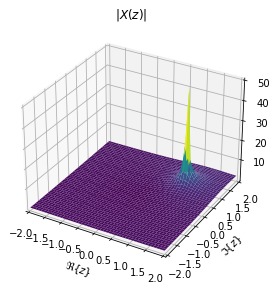

In [15]:
rez, imz = sym.symbols('rez imz', real=True)

X = z / (z - z0)
X1 = X.subs({z: rez+sym.I*imz, z0: 1+sym.I})

sym.plotting.plot3d(abs(X1), (rez, -2, 2), (imz, -2, 2),
                    xlabel=r'$\Re\{z\}$', ylabel=r'$\Im\{z\}$', title=r'$|X(z)|$');

Alternativamente, a transformação $z$ $X(z)$ pode ser ilustrada por seu gráfico pólo-zero.

In [16]:
#Pólos

poles = sym.roots(sym.denom(X), z)
poles

In [17]:
#Zeros

zeros = sym.roots(sym.numer(X), z)
zeros

Os dicionários acima são compostos de pólos e zeros, e seus graus. 

A fim de ilustrar a localização dos pólos e zeros no plano $z$, o gráfico pólo-zero é mostrado abaixo para $z_0 = 1 + j$

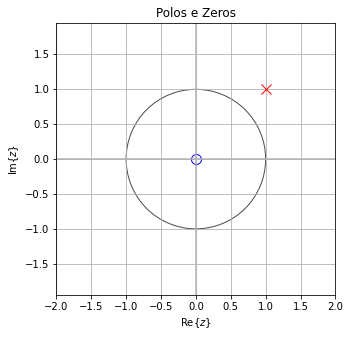

In [18]:
X2 = X.subs(z0, 1+sym.I)
pole_zero_plot(sym.roots(sym.denom(X2), z), sym.roots(sym.numer(X2), z))

## 9. Resumo de propriedades, teoremas e transformações

As propriedades, teoremas e as transformações da transformada-$z$ bilateral, conforme derivadas nas seções anteriores, são resumidas a seguir. As tabelas correspondentes servem de referência para a aplicação da transformada $z$ na disciplina de sinais e sistemas.

### 9.1 Definição

A transformada $z$ e seu inverso são definidos como

\begin{align}
X(z) &= \sum_{k = -\infty}^{\infty} x[k] \, z^{-k} \\
x[k] &= \frac{1}{2 \pi j} \oint_{C} X(z) \, z^{k - 1} \; dz
\end{align}

onde $z \in \text{ROC} \{x[k] \}$.

### 9.2 Propriedades e Teoremas

As propriedades e teoremas da transformada $z$ bilateral são dados como

| &#65279; | $x[k]$ | $X(z) = \mathcal{Z} \{ x[k] \}$ | ROC |
|:---|:---:|:---:|:---|
| Linearidade | $A \, x_1[k] + B \, x_2[k]$ | $A \, X_1(z) + B \, X_2(z)$ | $\supseteq \text{ROC}\{x_1[k]\} \cap \text{ROC}\{x_2[k]\}$ |
| Conjugação | $x^*[k]$ | $X^*(z^*)$ | $\text{ROC}\{ x[k] \}$ |
| Sinal de valor Real | $x[k] = x^*[k]$ | $X(z) = X^*(z^*)$ | |
| Convolução Linear | $x[k] * h[k]$ | $X(z) \cdot H(z)$ | $\supseteq \text{ROC}\{x[k]\} \cap \text{ROC}\{h[k]\}$ |
| Deslocamento | $x[k - \kappa]$ | $z^{- \kappa} \cdot X(z)$ | $\supseteq \text{ROC}\{x[k]\} \setminus \{0, \infty \}$ |
| Modulação | $z_0^k \cdot x[k]$ | $X\left( \frac{z}{z_0} \right)$ | $\{z: \frac{z}{z_0} \in \text{ROC} \{ x[k] \} \}$ |
| Reversão | $x[-k]$ | $X \left( \frac{1}{z} \right)$ | $\{z: \frac{1}{z} \in \text{ROC} \{ x[k] \} \}$ |

onde $A, B, z_0 \in \mathbb{C}$ e $\kappa \in \mathbb{Z}$